In [1]:
import numpy as np

# Implementation of secant method

In [2]:
k = -15
g_args = (k,)

def g(y, k): 
    return np.exp(k*y) - 0.5

In [3]:
delta_y = 0.0001
y0 = 0.0
y1 = y0 + delta_y
thres = 1e-10

In [4]:
def fzero_secant(y0, y1, g, thres, g_args=()):
    
    y_i_1, y_i_2 = y1, y0
    g_y_i_1, g_y_i_2 = g(y_i_1, *g_args), g(y_i_2, *g_args)
    
    while g_y_i_1 > thres:
        
        y_i = (y_i_2 * g_y_i_1 - y_i_1 * g_y_i_2) / (g_y_i_1 - g_y_i_2)
        
        y_i_2 = y_i_1
        y_i_1 = y_i
        g_y_i_2 = g_y_i_1
        g_y_i_1 = g(y_i, *g_args)
        
    return y_i_1

In [5]:
y_at_zero = fzero_secant(y0, y1, g, thres, g_args)

func_value_near_root = g(y_at_zero, *g_args)
func_value_is_almost_zero = func_value_near_root < thres
print("func_value_is_almost_zero: {}".format(func_value_is_almost_zero))

func_value_is_almost_zero: True


# Implementation of implicit Euler using secant method

## Define function

In [6]:
def dydt(t, y):
    return -15*y

def gg(y_next, y_n, h, dydt, t):
    return y_next - y_n - h * dydt(t+h,y_next)

def prop_a_step(y_n0, t, h, dydt, delta_y, gg, thres):
    """`gg_args` : may be implemented as struct in C++ along with the usage of template function"""
    gg_args = (y_n0, h, dydt, t)
    y_n1 = fzero_secant(y_n0, y_n0+delta_y, gg, thres, gg_args)
    return y_n1

## Configuration

In [7]:
y_0 = 1.0
t_0 = 0.0
h = 0.01
N_t = 10
delta_y = 0.0001  # may vary from the magnitude of v or small rho
thres = 1e-12

In [8]:
y_arr = np.empty((N_t,), dtype=float)
t_arr = t_0 + np.arange(N_t) * h

In [9]:
y_arr[0] = y_0
for t_idx in range(N_t-1):
    _t = t_arr[t_idx]
    _delta_t = t_arr[t_idx+1] - _t
    y_arr[t_idx+1] = prop_a_step(y_arr[t_idx], _t, _delta_t, dydt, delta_y, gg, thres)

## Plot

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.size'] = 15

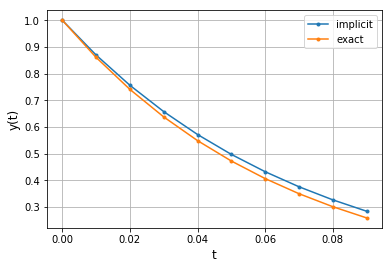

In [11]:
fig, ax = plt.subplots()

ax.plot(t_arr, y_arr, '.-', label='implicit')
ax.plot(t_arr, np.exp(-15*t_arr), '.-', label='exact')

ax.set_xlabel('t')
ax.set_ylabel('y(t)')

ax.legend()

In [12]:
fig.savefig("implicit-euler-test.png")